## Assignment

Import necessary library

In [24]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Read the data

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [3]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [4]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [5]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [6]:
### type your answer here
df_can.set_index('Country', inplace=True)

print(df_can.loc['China'])   # Dataset for China
print(df_can.loc['India'])   # Dataset for India

Continent                  Asia
Region             Eastern Asia
DevName      Developing regions
1980                       5123
1981                       6682
1982                       3308
1983                       1863
1984                       1527
1985                       1816
1986                       1960
1987                       2643
1988                       2758
1989                       4323
1990                       8076
1991                      14255
1992                      10846
1993                       9817
1994                      13128
1995                      14398
1996                      19415
1997                      20475
1998                      21049
1999                      30069
2000                      35529
2001                      36434
2002                      31961
2003                      36439
2004                      36619
2005                      42584
2006                      33518
2007                      27642
2008    

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [47]:
years = list(map(int,range(1980, 2014)))
china = df_can.loc['China', years] 
india = df_can.loc['India', years]

compare = df_can.loc[['China', 'India'], years].transpose()
compare.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


<Figure size 432x288 with 0 Axes>

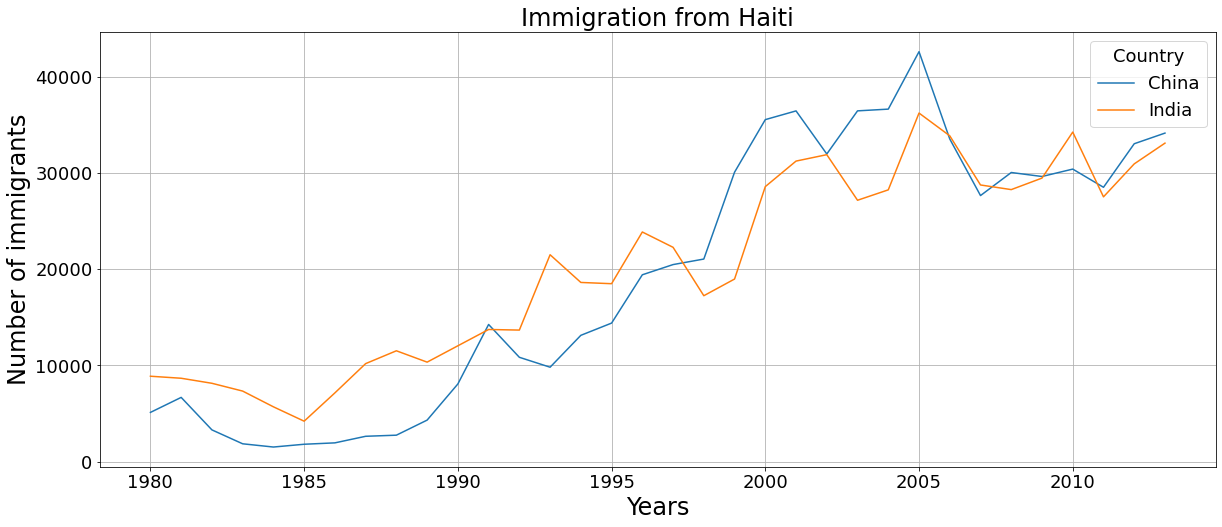

In [48]:
### type your answer here
plt.figure()
compare.plot(kind='line', figsize=(20, 8))

plt.title('Immigration from Haiti', fontsize='24')
plt.ylabel('Number of immigrants', fontsize='24')
plt.xlabel('Years', fontsize='24')
plt.grid()
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [54]:
### type your answer here
trend = df_can.sort_values(by=['Total'], ascending=False, axis=0).iloc[:5]
#trend_t = trend[['Country', 'Total']]
trend_t = trend[years].transpose()
trend_t.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<Figure size 432x288 with 0 Axes>

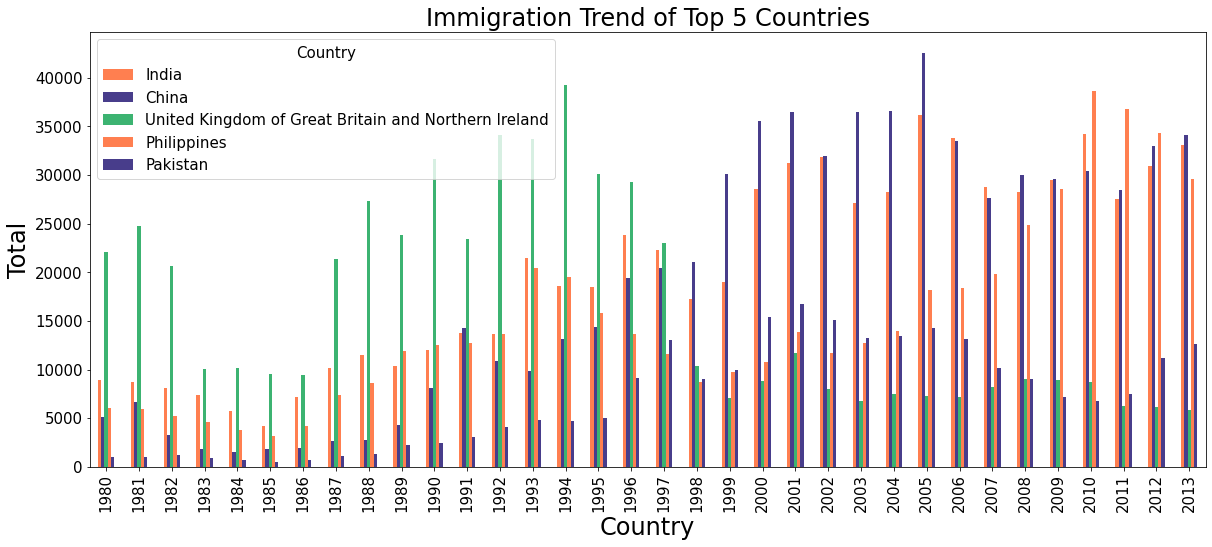

In [56]:
### type your answer here
plt.figure()
font = {'family' : 'normal',
        'size'   : 15}
mpl.rc('font', **font)

trend_t.plot(kind='bar', 
             figsize=(20, 8), 
             color=['coral', 'darkslateblue', 'mediumseagreen'])
plt.title('Immigration Trend of Top 5 Countries', fontsize='24')
plt.ylabel('Total', fontsize='24')
plt.xlabel('Country', fontsize='24')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [69]:
least = df_can.sort_values(by=['Total'], ascending=True, axis=0).iloc[:5]
least = least[years].transpose()
least.head()

Country,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia
1980,0,0,0,1,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


<Figure size 432x288 with 0 Axes>

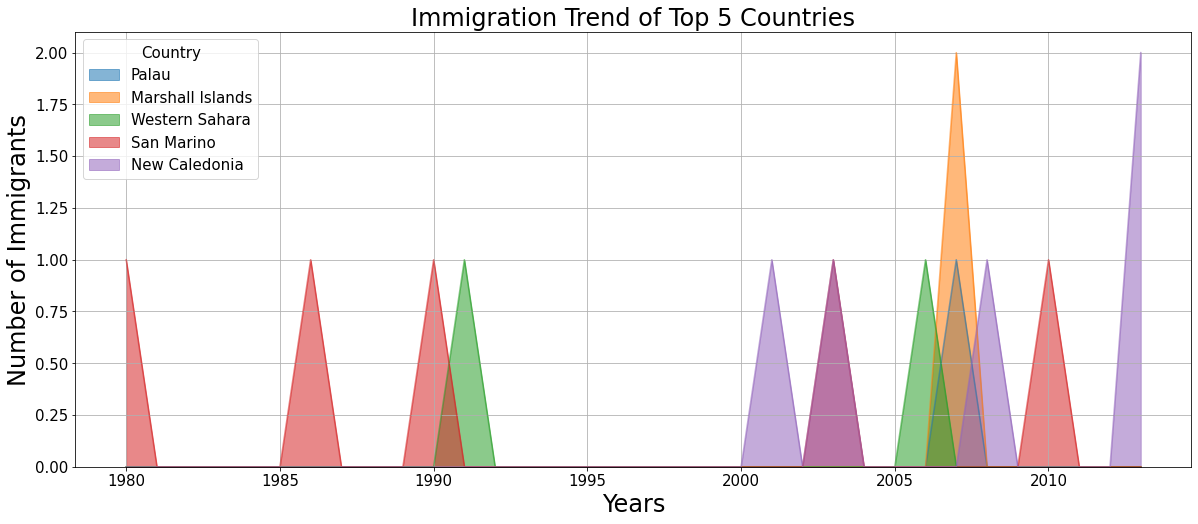

In [72]:
### type your answer here
plt.figure()
font = {'family' : 'normal',
        'size'   : 15}
mpl.rc('font', **font)

least.plot.area(stacked=False, 
                 alpha=0.55, 
                 figsize=(20,8))
plt.title('Immigration Trend of Top 5 Countries', fontsize='24')
plt.ylabel('Number of Immigrants', fontsize='24')
plt.xlabel('Years', fontsize='24')
plt.grid()
plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

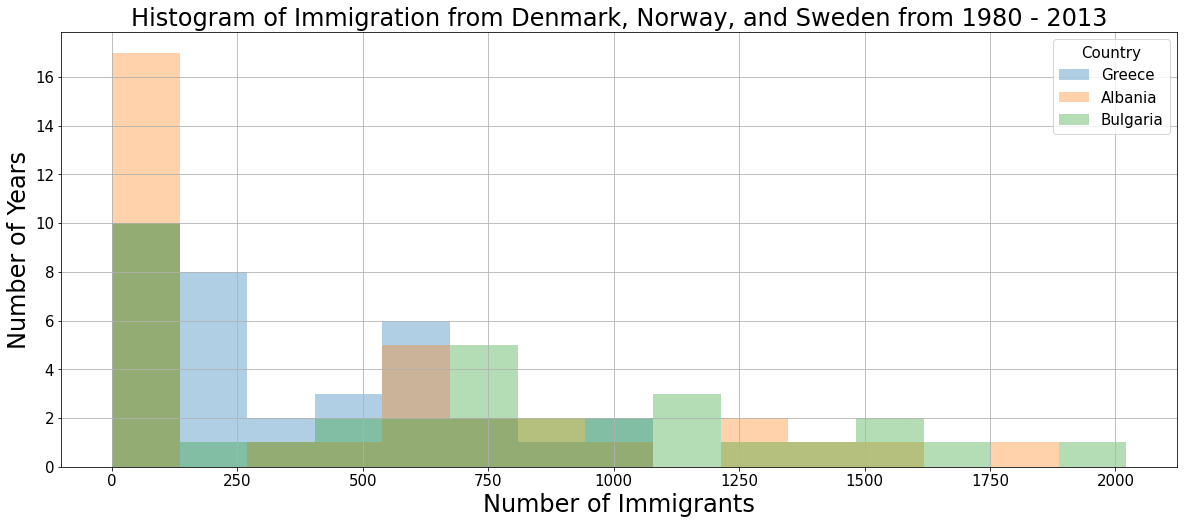

In [75]:
### type your answer here
data_display = df_can.loc[['Greece','Albania','Bulgaria'], years].transpose()

font = {'family' : 'normal',
        'size'   : 15}
mpl.rc('font', **font)

data_display.plot.hist(bins=15, 
                       alpha=0.35,
                       figsize=(20, 8))
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013', fontsize='24')
plt.ylabel('Number of Years', fontsize='24')
plt.xlabel('Number of Immigrants', fontsize='24')
plt.grid()
plt.show()


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [13]:
### type your answer here
top_15 = df_can.sort_values(by=['Total'], ascending=False).iloc[:15]
top_15 = top_15[years]
top_15.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

<Figure size 432x288 with 0 Axes>

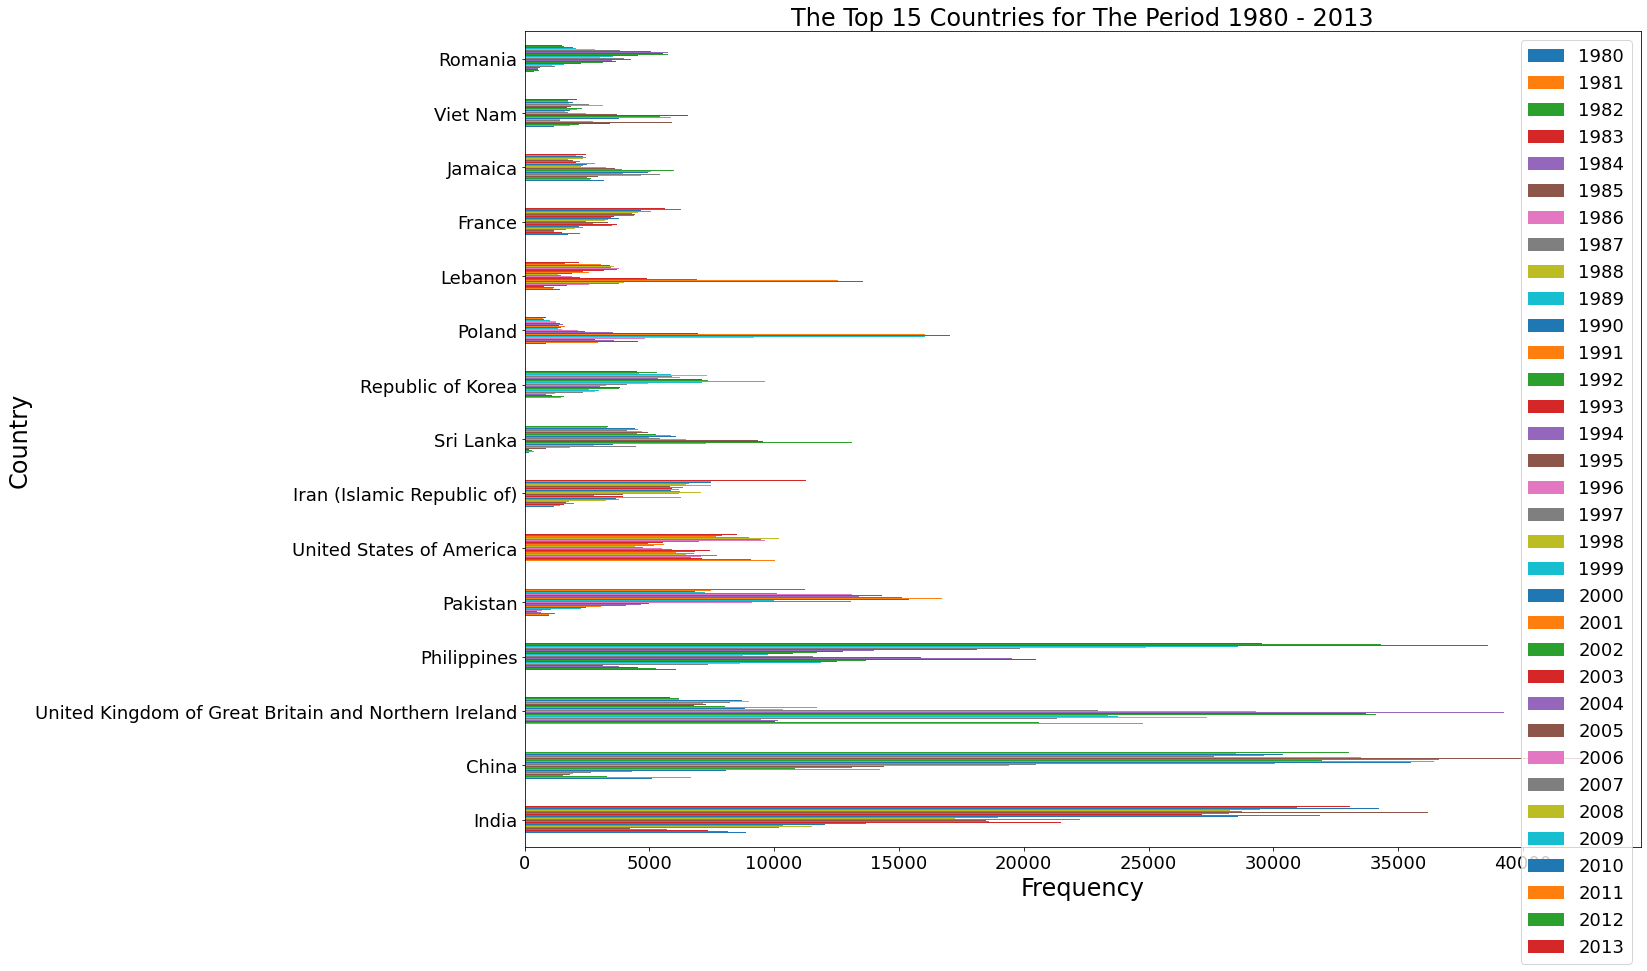

In [87]:
### type your answer here
plt.figure()
font = {'family' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

top_15.plot.barh(figsize=(20,15), zorder=2)


plt.title('The Top 15 Countries for The Period 1980 - 2013', fontsize='24')
plt.xlabel('Frequency', fontsize='24')
plt.ylabel('Country', fontsize='24')
plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).